# Exploratory Data Analysis (EDA) (Notebook 1_Week 3 Deliverable_Part2)

### Import libraries

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

import calendar # for months bar chart

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading clean Dataset

In [2]:
# Load the data
df = pd.read_csv('declarations-exterminations-punaises-de-lit-1.csv')

#### Verify Datatype and make modifications

In [3]:
print(df.dtypes)

NO_DECLARATION        int64
DATE_DECLARATION     object
DATE_PRIOR_INSP      object
EXT_FREQ            float64
DATE_FIRST_EXT       object
DATE_LAST_EXT        object
HOOD_NUM             object
HOOD_NAME            object
BORO_NAME            object
MTM8_X              float64
MTM8_Y              float64
LONGITUDE           float64
LATITUDE            float64
LONG_LAT             object
MTM_X_Y              object
DEC_MONTH             int64
DEC_ISSUE             int64
DATE_DIFF           float64
dtype: object


In [4]:
# Convert 'DATE_INSP_VISPRE', 'DATE_DEBUTTRAIT', and 'DATE_FINTRAIT'
df['DATE_PRIOR_INSP'] = pd.to_datetime(df['DATE_PRIOR_INSP'])
df['DATE_FIRST_EXT'] = pd.to_datetime(df['DATE_FIRST_EXT'])
df['DATE_LAST_EXT'] = pd.to_datetime(df['DATE_LAST_EXT'])
df['DATE_DECLARATION'] = pd.to_datetime(df['DATE_DECLARATION'])
print(df.dtypes)

NO_DECLARATION               int64
DATE_DECLARATION    datetime64[ns]
DATE_PRIOR_INSP     datetime64[ns]
EXT_FREQ                   float64
DATE_FIRST_EXT      datetime64[ns]
DATE_LAST_EXT       datetime64[ns]
HOOD_NUM                    object
HOOD_NAME                   object
BORO_NAME                   object
MTM8_X                     float64
MTM8_Y                     float64
LONGITUDE                  float64
LATITUDE                   float64
LONG_LAT                    object
MTM_X_Y                     object
DEC_MONTH                    int64
DEC_ISSUE                    int64
DATE_DIFF                  float64
dtype: object


#### Dataframe summary

In [5]:
#print(df.shape)

print('Bed bug extermination declarations')
print('')
print('==================COLUMNS==================')
print(df.columns)
print('')
print('==================HEAD==================')
print(df.head())
print('')
print('==================DESCRIBE==================')
print(df.describe())

Bed bug extermination declarations

==================COLUMNS==================
Index(['NO_DECLARATION', 'DATE_DECLARATION', 'DATE_PRIOR_INSP', 'EXT_FREQ',
       'DATE_FIRST_EXT', 'DATE_LAST_EXT', 'HOOD_NUM', 'HOOD_NAME', 'BORO_NAME',
       'MTM8_X', 'MTM8_Y', 'LONGITUDE', 'LATITUDE', 'LONG_LAT', 'MTM_X_Y',
       'DEC_MONTH', 'DEC_ISSUE', 'DATE_DIFF'],
      dtype='object')

==================HEAD==================
   NO_DECLARATION DATE_DECLARATION DATE_PRIOR_INSP  EXT_FREQ DATE_FIRST_EXT  \
0            4254       2012-10-28      2012-09-21      1.00     2012-09-21   
1             830       2011-09-16      2011-07-13      1.00     2011-07-27   
2            1380       2011-11-08      2011-11-02      1.00     2011-11-07   
3             455       2011-08-10      2011-08-09      1.00     2011-08-09   
4            1243       2011-10-26      2011-09-16      1.00     2011-10-05   

  DATE_LAST_EXT HOOD_NUM      HOOD_NAME                            BORO_NAME  \
0    2012-09-21       2

In [6]:
print('==================BORO_VALUE_COUNT==================')
print(df['BORO_NAME'].value_counts())
print('')
print('==================ANALYSIS==================')
print('max:',np.max(df['BORO_NAME'].value_counts()))
print('min:',np.min(df['BORO_NAME'].value_counts()))
print('sum:',np.sum(df['BORO_NAME'].value_counts()))
print('mean:',np.mean(df['BORO_NAME'].value_counts()))
print('mean:',np.round(np.mean(df['BORO_NAME'].value_counts()),2))
print('std:',np.std(df['BORO_NAME'].value_counts()))
print('std:',np.round(np.std(df['BORO_NAME'].value_counts()),2))
print('median:',np.median(df['BORO_NAME'].value_counts()))
print ('count:',df['BORO_NAME'].value_counts().count())

==================BORO_VALUE_COUNT==================
Rosemont–La Petite-Patrie                   4320
Villeray–Saint-Michel–Parc-Extension        4304
Mercier–Hochelaga-Maisonneuve               4036
Le Plateau-Mont-Royal                       3696
Ville-Marie                                 3347
Côte-des-Neiges–Notre-Dame-de-Grâce         2909
Ahuntsic-Cartierville                       2695
Montréal-Nord                               1754
Le Sud-Ouest                                1251
Saint-Laurent                               1116
Saint-Léonard                                994
Verdun                                       782
Rivière-des-Prairies–Pointe-aux-Trembles     695
LaSalle                                      521
Lachine                                      361
Anjou                                        304
Outremont                                    145
Pierrefonds-Roxboro                          117
L'Île-Bizard–Sainte-Geneviève                 18
Name: BORO_NAME,

#### Create Declaration date Month and Year Columns

In [16]:
#We have this for month:
df['DEC_MONTH'] = pd.DatetimeIndex(df['DATE_DECLARATION']).month
df['DEC_YEAR'] = pd.DatetimeIndex(df['DATE_DECLARATION']).year

#### Correletation

In [7]:
print('==================CORR==================')
print('Corr:',df.corr())

==================CORR==================
Corr:                 NO_DECLARATION  EXT_FREQ  MTM8_X  MTM8_Y  LONGITUDE  LATITUDE  \
NO_DECLARATION            1.00     -0.05   -0.05   -0.00      -0.05     -0.00   
EXT_FREQ                 -0.05      1.00    0.02    0.01       0.02      0.01   
MTM8_X                   -0.05      0.02    1.00    0.22       1.00      0.22   
MTM8_Y                   -0.00      0.01    0.22    1.00       0.22      1.00   
LONGITUDE                -0.05      0.02    1.00    0.22       1.00      0.22   
LATITUDE                 -0.00      0.01    0.22    1.00       0.22      1.00   
DEC_MONTH                 0.08     -0.05   -0.00    0.02      -0.00      0.02   
DEC_ISSUE                  nan       nan     nan     nan        nan       nan   
DATE_DIFF                 0.11     -0.03   -0.07    0.01      -0.07      0.01   

                DEC_MONTH  DEC_ISSUE  DATE_DIFF  
NO_DECLARATION       0.08        nan       0.11  
EXT_FREQ            -0.05        nan      

# Data Perspective
- One variable
    - Numeric variables
    - Categorical variables
Business Perspective

## One Variable (numeric)

==================DESCRIBE==================
count   33357.00
mean       37.00
std        79.00
min      -348.00
25%         6.00
50%        15.00
75%        39.00
max      3737.00
Name: DATE_DIFF, dtype: float64



C:\Users\outpost\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\outpost\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

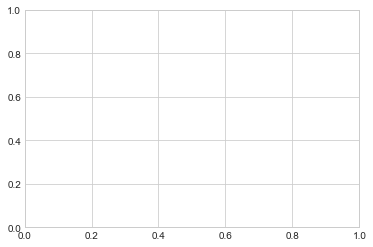

In [34]:
# Analyzing number of days between declaration and inspection

# Histogram
print('==================DESCRIBE==================')
print(df['DATE_DIFF'].describe().round())
print('')


plt.hist(df['DATE_DIFF'], bins=50)
plt.show()

# Box plot
#plt.boxplot(df['DEC_ISSUE'])
#plt.xticks([1], df['DEC_ISSUE'], rotation='horizontal')
#plt.show()

In [9]:
#TODO: Analyze all the numerical variables

## One Variable (categorical)

### Boroughs

==================BORO_DESC==================
Rosemont–La Petite-Patrie                   4320
Villeray–Saint-Michel–Parc-Extension        4304
Mercier–Hochelaga-Maisonneuve               4036
Le Plateau-Mont-Royal                       3696
Ville-Marie                                 3347
Côte-des-Neiges–Notre-Dame-de-Grâce         2909
Ahuntsic-Cartierville                       2695
Montréal-Nord                               1754
Le Sud-Ouest                                1251
Saint-Laurent                               1116
Saint-Léonard                                994
Verdun                                       782
Rivière-des-Prairies–Pointe-aux-Trembles     695
LaSalle                                      521
Lachine                                      361
Anjou                                        304
Outremont                                    145
Pierrefonds-Roxboro                          117
L'Île-Bizard–Sainte-Geneviève                 18
Name: BORO_NAME, dtype:

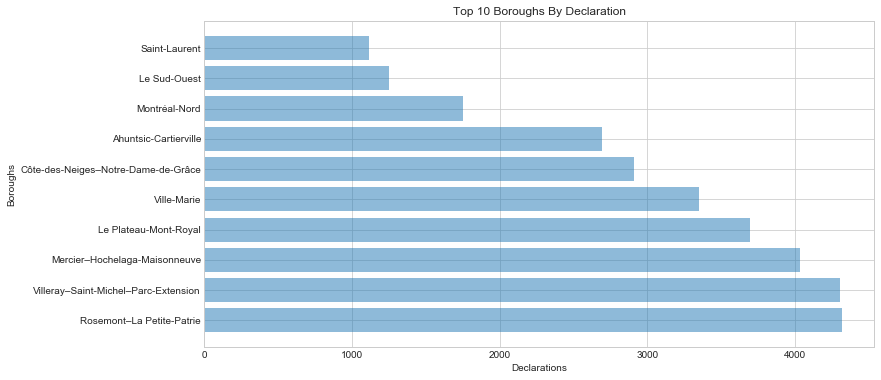

In [10]:
# Ref. : https://pythonspot.com/matplotlib-bar-chart/
# Ref. : https://python-graph-gallery.com/2-horizontal-barplot/

# Analyze by borough distribution with horizontal bar chart
print('==================BORO_DESC==================')
print(df['BORO_NAME'].value_counts())
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['BORO_NAME'].value_counts()[1]
             +df['BORO_NAME'].value_counts()[2]
             +df['BORO_NAME'].value_counts()[3])
           /(df['BORO_NAME'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Boroughs By Declaration')

labels = df['BORO_NAME'].value_counts().head(10).index
values = df['BORO_NAME'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.ylabel('Boroughs')
plt.xlabel('Declarations')


plt.show()

In [11]:
# Ref. : https://pythonspot.com/matplotlib-bar-chart/
# Ref. : https://python-graph-gallery.com/2-horizontal-barplot/

# Analyze by borough distribution with horizontal bar chart
print('==================BORO_DESC==================')
((df.groupby(['BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))


==================BORO_DESC==================


,EXT_QT,DECL_QT
BORO_NAME,,
Rosemont–La Petite-Patrie,6571.00,4320
Villeray–Saint-Michel–Parc-Extension,6197.00,4304
Mercier–Hochelaga-Maisonneuve,6005.00,4036
Le Plateau-Mont-Royal,5690.00,3696
Ville-Marie,5031.00,3347
Côte-des-Neiges–Notre-Dame-de-Grâce,4196.00,2909
Ahuntsic-Cartierville,3719.00,2695
Montréal-Nord,2476.00,1754
Le Sud-Ouest,1715.00,1251


For boroughs orders in descending order based on extermination reports, the order remains unchanged when descending based on the number of declarations.

### Neighborhoods

==================TOP_10_HOOD==================
Sainte-Marie      1730
Crémazie          1205
Parc-Extension    1171
Maisonneuve       1150
Lorimier           964
Vieux-Rosemont     938
Est                866
Père-Marquette     800
Cartierville       793
Montagne           792
Name: HOOD_NAME, dtype: int64

==================TOP_4==================
First 4 locations represent 24.0 % of total declarations counts



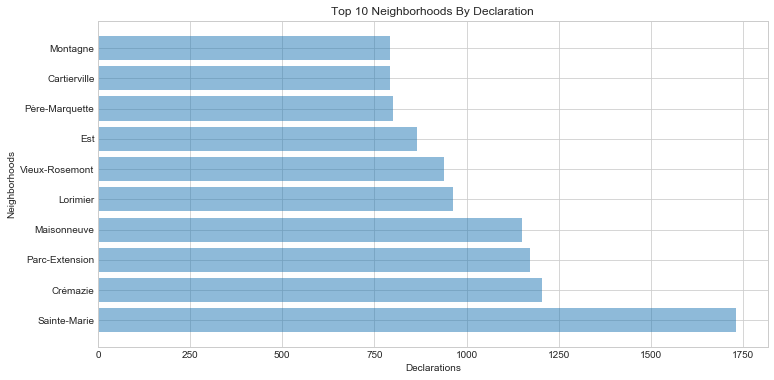

In [12]:
# Analyze Neighborhood distribution
print('==================TOP_10_HOOD==================')
print(df['HOOD_NAME'].value_counts().head(10))
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['HOOD_NAME'].value_counts()[1]
             +df['HOOD_NAME'].value_counts()[2]
             +df['HOOD_NAME'].value_counts()[3])
           /(df['HOOD_NAME'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Neighborhoods By Declaration')

plt.ylabel('Neighborhoods')
plt.xlabel('Declarations')

labels = df['HOOD_NAME'].value_counts().head(10).index
values = df['HOOD_NAME'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()

In [13]:
# Analyze Neighborhood distribution
print('==================TOP_10_HOOD==================')
((df.groupby(['HOOD_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))

==================TOP_10_HOOD==================


,EXT_QT,DECL_QT
HOOD_NAME,,
Sainte-Marie,2854.00,1730
Crémazie,1953.00,1205
Maisonneuve,1763.00,1150
Parc-Extension,1534.00,1171
Lorimier,1399.00,964
Père-Marquette,1392.00,800
Vieux-Rosemont,1319.00,938
Est,1216.00,866
Parc-Laurier,1213.00,670


The order for neighborhoods is different when descending based based on extermination reports rather than the number of declarations.

When comparing the results between boroughs and neighborhoods, the number of exterminations reports per declaration is more apparent at the neighborhood level. Specifically, it is possible to have more reports for a neighborhood, while having fewer exterminations reports. This is not apparent at the borough level.

### Months

==================DECLARATION_BY_MONTH_DESC==================
10    4022
9     3671
11    3379
7     3217
8     3202
12    2703
6     2552
2     2264
3     2186
5     2069
4     2069
1     2031
Name: DEC_MONTH, dtype: int64



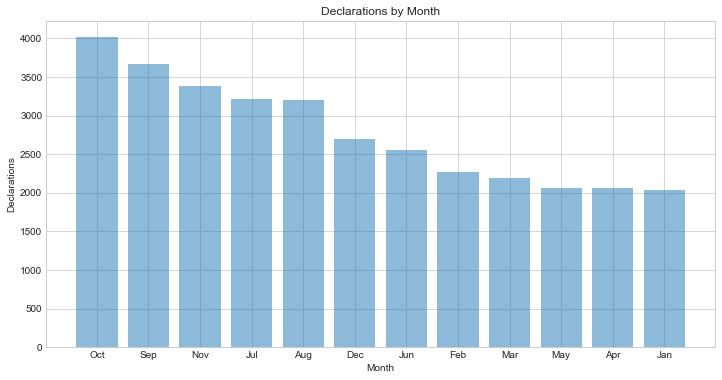

In [35]:
# Analyze Months distribution from declaration
print('==================DECLARATION_BY_MONTH_DESC==================')
print( (df['DEC_MONTH'].value_counts()) )
print('')

# Bar Chart

df['DEC_MONTH'] = df['DEC_MONTH'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12,6))
plt.title('Declarations by Month')
plt.xlabel('Month')
plt.ylabel('Declarations')

labels = df['DEC_MONTH'].value_counts().head(12).index
values = df['DEC_MONTH'].value_counts().head(12).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

### Intersections

==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================
-73.571239_45.584338                     264
-73.659233_45.569024                     181
-73.620588_45.551456                     151
-73.582592_45.49409                      148
-73.68714399999999_45.518173             139
-73.58043_45.492816999999995             136
-73.60591600000001_45.428377000000005    116
-73.563652_45.528809                     114
-73.604952_45.58441                      107
-73.634049_45.504446                     101
Name: LONG_LAT, dtype: int64

==================TOP_4==================
First 4 locations represent 14.0 % of total declarations counts



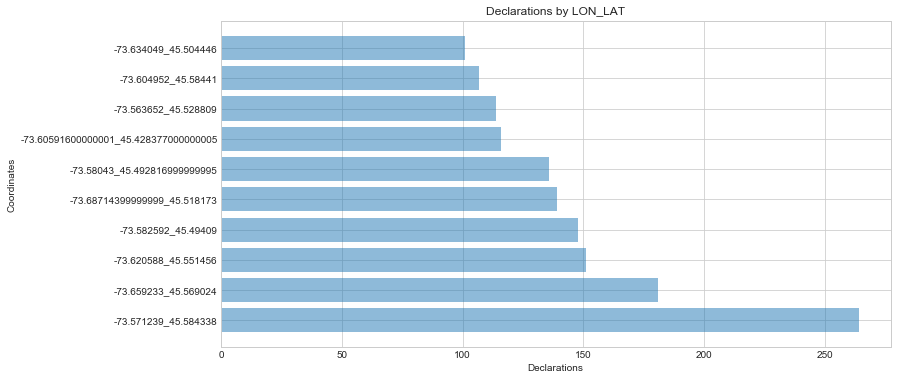

In [16]:
print('==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================')
# Analyze Coordinates distribution from declaration
print(df['LONG_LAT'].value_counts().head(10))
print('')

print('==================TOP_4==================')
print( 'First 4 locations represent '+str( round((df['BORO_NAME'].value_counts()[0]
             +df['LONG_LAT'].value_counts()[1]
             +df['LONG_LAT'].value_counts()[2]
             +df['LONG_LAT'].value_counts()[3])
           /(df['LONG_LAT'].value_counts()).sum()*100 ))  + ' % of total declarations counts')
print('')


# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by LON_LAT')

plt.ylabel('Coordinates')
plt.xlabel('Declarations')

labels = df['LONG_LAT'].value_counts().head(10).index
values = df['LONG_LAT'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()


In [27]:
# Ref. : https://stackoverflow.com/questions/37965380/python-pandas-simple-pivot-table-sum-count
    # Ref. : https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# Ref. : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
print('')
print('==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================')
((df.groupby(['LONG_LAT','HOOD_NAME','BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
       .head(10))




==================TOP_10_INTERSECTIONS_BASED_ON_EXT_FREQ_AND_ON_DECLARATIONS==================


,,,EXT_QT,DECL_QT
LONG_LAT,HOOD_NAME,BORO_NAME,,
-73.571239_45.584338,Grande-Prairie,Saint-Léonard,352.00,264
-73.68714399999999_45.518173,Grenet,Saint-Laurent,302.00,139
-73.630494_45.509854,Parc-Kent,Côte-des-Neiges–Notre-Dame-de-Grâce,210.00,67
-73.659233_45.569024,Sault-au-Récollet,Ahuntsic-Cartierville,193.00,181
-73.585636_45.527404,Parc-Laurier,Le Plateau-Mont-Royal,189.00,79
-73.600298_45.637873,Marc-Aurèle-Fortin,Rivière-des-Prairies–Pointe-aux-Trembles,181.00,76
-73.61954399999999_45.545823999999996,Crémazie,Villeray–Saint-Michel–Parc-Extension,176.00,74
-73.53832299999999_45.543811,Hochelaga,Mercier–Hochelaga-Maisonneuve,164.00,63
-73.582592_45.49409,Montagne,Ville-Marie,162.00,148


By going from the neighborhood to the intersection level, the number of extermination reports is more apparent is being independent from the number of declarations.

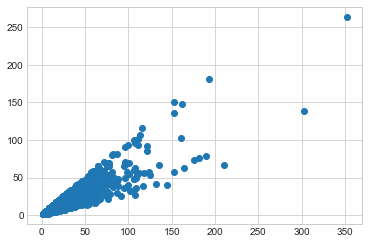

In [31]:
df_coff = ((df.groupby(['LONG_LAT','HOOD_NAME','BORO_NAME'])
       .agg({'EXT_FREQ': sum, 'NO_DECLARATION':'count'}))
       .sort_values(by = ['EXT_FREQ','NO_DECLARATION'],ascending=False)
       .rename(columns={'EXT_FREQ':'EXT_QT','NO_DECLARATION':'DECL_QT'})
        )
# Scatter plot
plt.figure(figsize=(12,6))
plt.title('Declarations vs. Extermination Reports')

plt.ylabel('Coordinates')
plt.xlabel('Declarations')

plt.plot(df_coff['EXT_QT'], df_coff['DECL_QT'], 'o')
plt.show()

There is a proportional relationship between the number of declarations and the number of extermination reports. Specifically, one report is assumed to be included in one declaration, as a minimum.

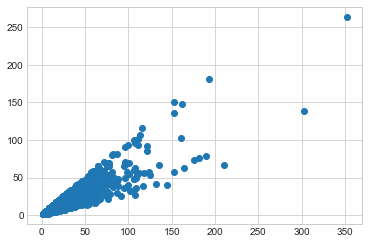

In [31]:
# Scatter plot
plt.plot(df_coff['EXT_QT'], df_coff['DECL_QT'], 'o')
plt.show()

In [ ]:
# Over time trend

In [18]:
df.groupby(['DEC_YEAR','BORO_NAME','HOOD_NAME'])['HOOD_NAME'].count()

DEC_YEAR  BORO_NAME                                 HOOD_NAME                    
2011      Ahuntsic-Cartierville                     Cartierville                      20
                                                    La Visitation                     12
                                                    Nicolas-Viel                      21
                                                    Nouveau-Bordeaux                   5
                                                    Saint-Sulpice                      4
                                                    Sault-au-Récollet                 30
          Anjou                                     Anjou                             22
          Côte-des-Neiges–Notre-Dame-de-Grâce       Côte-Saint-Antoine                14
                                                    Loyola                            23
                                                    Parc-Kent                         27
                            

## Correlation

In [19]:
# Correlation
df.corr()

,NO_DECLARATION,EXT_FREQ,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,DEC_MONTH,DEC_ISSUE,DATE_DIFF,DEC_YEAR
NO_DECLARATION,1.00,-0.05,-0.05,-0.00,-0.05,-0.00,0.08,nan,0.11,0.99
EXT_FREQ,-0.05,1.00,0.02,0.01,0.02,0.01,-0.05,nan,-0.03,-0.04
MTM8_X,-0.05,0.02,1.00,0.22,1.00,0.22,-0.00,nan,-0.07,-0.05
MTM8_Y,-0.00,0.01,0.22,1.00,0.22,1.00,0.02,nan,0.01,-0.01
LONGITUDE,-0.05,0.02,1.00,0.22,1.00,0.22,-0.00,nan,-0.07,-0.05
LATITUDE,-0.00,0.01,0.22,1.00,0.22,1.00,0.02,nan,0.01,-0.01
DEC_MONTH,0.08,-0.05,-0.00,0.02,-0.00,0.02,1.00,nan,0.05,-0.06
DEC_ISSUE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DATE_DIFF,0.11,-0.03,-0.07,0.01,-0.07,0.01,0.05,nan,1.00,0.10
DEC_YEAR,0.99,-0.04,-0.05,-0.01,-0.05,-0.01,-0.06,nan,0.10,1.00


There is a strong correlation between MTM8_X and Longitude, and another strong relationship between MTM8_Y and Latitude. All other relationships are negligible.

# Business Perspective

## Data Persepective

## One Variable

### Categorical

There are a few categorical values that we can generate utilizing our data.  This would be counts based on neighborhood (NOM_QR), borough (NOM_ARROND), declaration date (DATE_DECLARATION) and intersection location (COORD_X x COORD_Y) for longitude and latitude.  This would give us different insights on the infestations declared in the various areas of the city. 

### Numerical

Based on the categorical values we generated above, we can then establish Min, Max, Mean values based on those Counts.  We can also generate Sums based on the number of visits by location or by time of year (based on declaration dates) to possibly gain insight on variables such as temperature or moving period (seasonal). 

## Multiple Variables

Multi variable statistics can also be generated based on our dataset to try and establish trends and gain further insight. Examples of such include:

-	Counts on borough (NOM_ARROND) and neighborhood (NOM_QR) by date of declaration
-	Number of days between DATE_INSP_VISPRE and DATE_DECLARATION. 
(Long waiting period can cause infestations to spread.)
-	Number of days between DATE_DECLARATION - DATE_DEBUTTRAIT
-	(Long waiting period can cause infestations to spread.)


# Business Persepective

### Descriptive Data Analysis

■ Descriptive Analytics

What happened? We know that there were exterminations at this location (intersection) in the past, sometimes frequently.

■ Diagnostic Analytics

Why it happened? History of exterminations nearby, where the bed bugs spread through clothing, humans, animals or other items unto uncontaminated items. With an incubation period, the spread may have been undetected for one to two weeks. 
Used clothing, used furniture, rental housing, and travel accommodation facilities are available nearby from locations where exterminations occurred.
(Environment Canada 2018)


### Diagnostic Data Analysis

Bedbugs can spread and infest an area in numerous ways.  Based on government reports we know infestations can spread by human contact (clothing), unsanitary environments, along with used furniture and mattresses to name a few.  This exercise in data mining has been undertaken to potentially uncover flash points, periods and/or locations that can possibly bring to light problematic scenarios that we can rectify and decrease, if not eliminate, future infestations.

1.	Number of days between Inspection/Declaration and Start-End of extermination.  
(Given a lengthy waiting period we could have a potential opportunity for spreading)  

2.	Identify the most problematic boroughs
(What is the difference between worst and best ranked)

3.	Identify the most problematic neighborhood
(What is the difference between worst and best ranked)

4.	Based on 2 and 3, is the issue borough wide or at neighborhood level? 
(Management issue)

5.	When was the declaration made?
(Is the problem based on a specific time of year? Heat? Moving period?)

6.	Is a problem more relevant to a particular block?
(COORD_X x COORD_Y)

7.	Nbr_Exterminations x COORD_X x COORD_Y x Nom_QR
(Can the issue be subject to extermination mismanagement?) 
